Initial setup and first topic model run

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
%run "Common setup.ipynb"

In [3]:
RC = mk.RecordCollection("tmp/rest_filtered_corpora.txt")
corpora_df = wosis.rec_to_df(RC)

Remember to clear the `_citation.csv` files from temporary directory if re-running analysis!

<hr> Running topic model on corpora

In [4]:
topic_results = wosis.find_topics(corpora_df, num_topics=5)

Topic 1: model parameters sensitivity models data analysis parameter flow calibration time
Topic 2: optimization design method shape topology problem sensitivity element structural finite
Topic 3: uncertainty stochastic quantification carlo monte bayesian method uncertainties random polynomial
Topic 4: risk emissions energy assessment environmental exposure production cost health analysis
Topic 5: water soil climate river quality groundwater change management land runoff


Now we check that a specific paper of interest was included in one of the topics as a high-level check 

    Title: "Uncertainty in the environmental modelling process - A framework and guidance"
    DOI: "10.1016/j.envost.2007.02.004"

In [5]:
# # find paper of interest - see if it's still in the corpora
# tmp_df = topic_results.corpora_df  
# tmp_df.loc[tmp_df.id == 'WOS:000248233200001']

# for i in range(topic_results.num_topics):
#     topic_id = i + 1
#     tmp_topic = topic_results.get_topic_by_id(topic_id)
#     print("topic_id", topic_id)
#     print(tmp_topic.loc[tmp_topic.id == 'WOS:000248233200001']['id'])

relevant_topic = topic_results.find_paper_by_doi('10.1016/j.envost.2007.02.004')

Found in topic 3


In [6]:
model_param_df = topic_results.get_topic_by_id(1)
opti_design_df = topic_results.get_topic_by_id(2)
uncert_df = topic_results.get_topic_by_id(3)

In [7]:
model_param_rc = wosis.extract_recs(model_param_df['id'], RC, name='model_param')
opti_design_rc = wosis.extract_recs(opti_design_df['id'], RC, name='opti_design')
uncert_rc = wosis.extract_recs(uncert_df['id'], RC, name='uncert')

In [8]:
from functools import reduce

In [9]:
# Interested in the number of publications at each topic model iteration
filter_progress = []

In [10]:
topics_combined = reduce(lambda x, y: x + y, [model_param_rc, opti_design_rc, uncert_rc])

In [11]:
filter_progress.append(len(topics_combined))

In [12]:
param_opt_uncert_topic_df = wosis.rc_to_df(topics_combined)
param_opt_uncert_topic_df.to_csv('../data/param_opt_uncert_topics.csv')

In [13]:
topics_combined_results = wosis.find_topics(param_opt_uncert_topic_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data flow models parameter soil results
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte model quantification models analysis data
Topic 4: stochastic random method polynomial chaos quantification expansion equations collocation solution
Topic 5: neural network ann artificial networks fuzzy prediction algorithm models regression


In [14]:
model_sens_df = topics_combined_results.get_topic_by_id(1)
opti_design_df = topics_combined_results.get_topic_by_id(2)
uncert_bayes_df = topics_combined_results.get_topic_by_id(3)
stochastic_meth_df = topics_combined_results.get_topic_by_id(4)

In [15]:
st_model_sens_rc = wosis.extract_recs(model_sens_df['id'], RC, name='model_sens')
st_opti_design_rc = wosis.extract_recs(opti_design_df['id'], RC, name='opti_design')
st_uncert_bay_rc = wosis.extract_recs(uncert_bayes_df['id'], RC, name='uncert_bay')
st_stoch_rc = wosis.extract_recs(stochastic_meth_df['id'], RC, name='stoch')

In [16]:
subtopics_combined = reduce(lambda x, y: x + y, [st_model_sens_rc, st_opti_design_rc, st_uncert_bay_rc, st_stoch_rc])

In [17]:
filter_progress.append(len(subtopics_combined))

In [18]:
uasa_combined_df = wosis.rc_to_df(subtopics_combined)
uasa_combined_df.to_csv('../data/uasa_subtopics_combined.csv')

In [19]:
subtopics_combined_results = wosis.find_topics(uasa_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models parameter calibration based soil
Topic 2: optimization design shape topology method sensitivity structural problem analysis element
Topic 3: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 4: stochastic random polynomial method chaos quantification expansion equations problems collocation
Topic 5: flow transport aquifer sediment groundwater hydraulic field rate velocity concentration


In [20]:
combined_subsubtopic1 = subtopics_combined_results.get_topic_by_id(1)
combined_subsubtopic2 = subtopics_combined_results.get_topic_by_id(2)
combined_subsubtopic3 = subtopics_combined_results.get_topic_by_id(3)
combined_subsubtopic4 = subtopics_combined_results.get_topic_by_id(4)

In [21]:
model_sens2_rc = wosis.extract_recs(combined_subsubtopic1['id'], RC, name='model_sens2')
opti_design3_rc = wosis.extract_recs(combined_subsubtopic2['id'], RC, name='opti_design3')
uncertainty_rc = wosis.extract_recs(combined_subsubtopic3['id'], RC, name='uncertainty')
quantification_rc = wosis.extract_recs(combined_subsubtopic4['id'], RC, name='quantification')

In [22]:
subsubtopics_combined = reduce(lambda x, y: x + y, [model_sens2_rc, opti_design3_rc, uncertainty_rc, quantification_rc])

In [23]:
filter_progress.append(len(subsubtopics_combined))

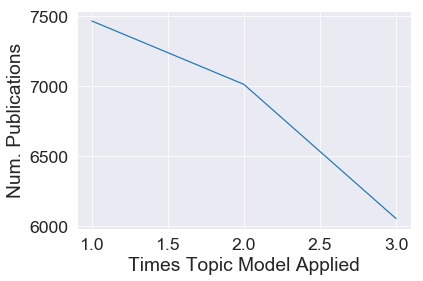

In [24]:
plt.plot([1, 2, 3], filter_progress)
plt.xlabel('Times Topic Model Applied')
plt.ylabel('Num. Publications');

In [25]:
subsubtopics_combined_df = wosis.rc_to_df(subsubtopics_combined)
subsubtopics_combined_df.to_csv('../data/subsubtopics_combined.csv')

Re-running topic model one last time to see if any new topics appear - they do not which suggests we have identified all relevant topics

In [26]:
subsubtopics_combined_results = wosis.find_topics(subsubtopics_combined_df, num_topics=5)

Topic 1: model sensitivity parameters analysis data models parameter results based soil
Topic 2: optimization design shape topology method sensitivity structural element problem analysis
Topic 3: stochastic random polynomial method chaos quantification expansion equations collocation solution
Topic 4: uncertainty bayesian uncertainties carlo monte quantification analysis models assessment probabilistic
Topic 5: rainfall flood runoff hydrological catchment model calibration watershed distributed catchments


<hr>

Plotting topic and publication trends for UA, SA, optimization.

In [27]:
SA_rc = wosis.extract_recs(combined_subsubtopic1['id'], RC, name='SA')

# optimization_rc = wosis.extract_recs(combined_subsubtopic2['id'], RC, name='optimization')
optimization_rc = opti_design3_rc
optimization_rc.name = 'optimization'

UA_rc = uncertainty_rc + quantification_rc

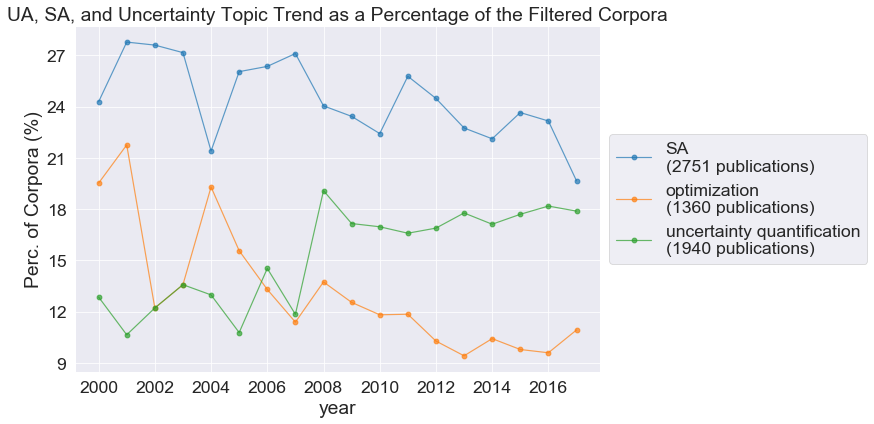

In [28]:
wos_plot.plot_topic_trend([SA_rc, optimization_rc, UA_rc], 
                          total_rc=RC, 
                          title='UA, SA, and Uncertainty Topic Trend as a Percentage of the Filtered Corpora', 
                          save_plot_fn='figs/Topic Trend Percentage')

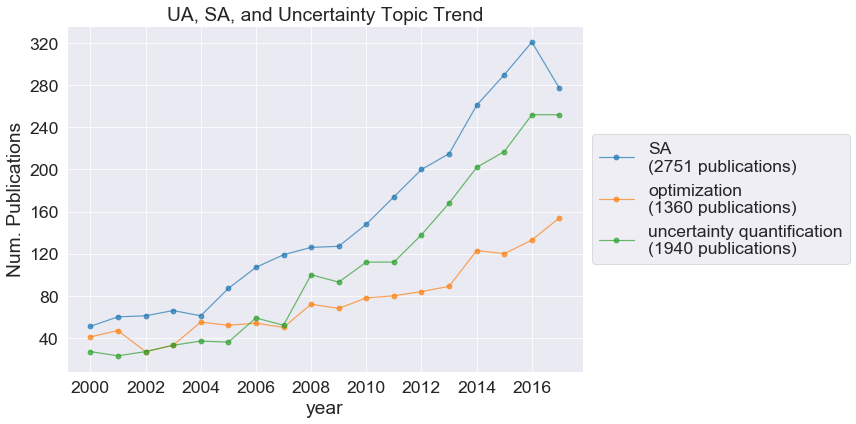

In [29]:
wos_plot.plot_topic_trend([SA_rc, optimization_rc, UA_rc], 
                          title='UA, SA, and Uncertainty Topic Trend', 
                          save_plot_fn='figs/uasa_uncert_topic_trend')

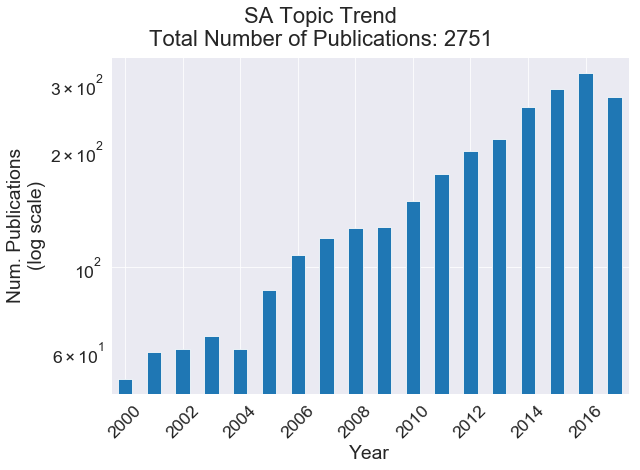

In [30]:
wos_plot.plot_pub_trend(SA_rc, title='SA Topic Trend', save_plot_fn='figs/sa_trend_2000-2017.png')

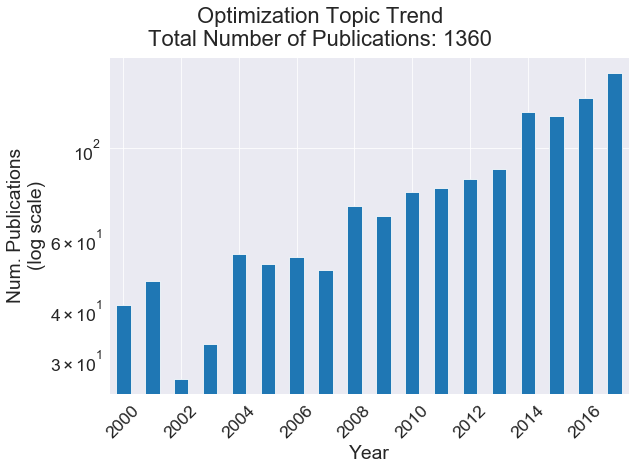

In [31]:
wos_plot.plot_pub_trend(optimization_rc, title='Optimization Topic Trend', save_plot_fn='figs/opti_trend_2000-2017.png')

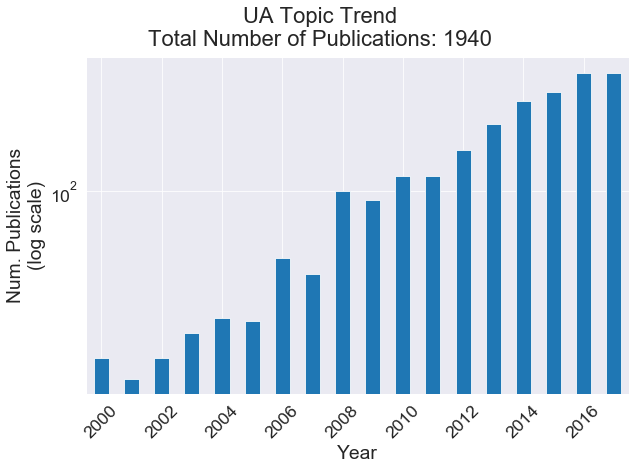

In [32]:
wos_plot.plot_pub_trend(UA_rc, title='UA Topic Trend', save_plot_fn='figs/ua_trend_2000-2017.png')

<hr>
Identifying papers relevant to frameworks and applications of UA/SA from the UA, SA, optimization topics.

In [33]:
ua_sa_papers = reduce(lambda x, y: x + y, [SA_rc, optimization_rc, UA_rc])

In [34]:
wosis.rc_to_df(ua_sa_papers).to_csv('../data/ua_sa_papers.csv')

1. Frameworks and guidelines for UA/SA

In [35]:
frameworks = wosis.keyword_matches(ua_sa_papers, ['framework', 'guideline', 'comparison', 'evalua', 'review', 'critici', 'overview', 'diagnostic'], threshold=95.0)

In [36]:
all_frameworks = frameworks.combine_recs()

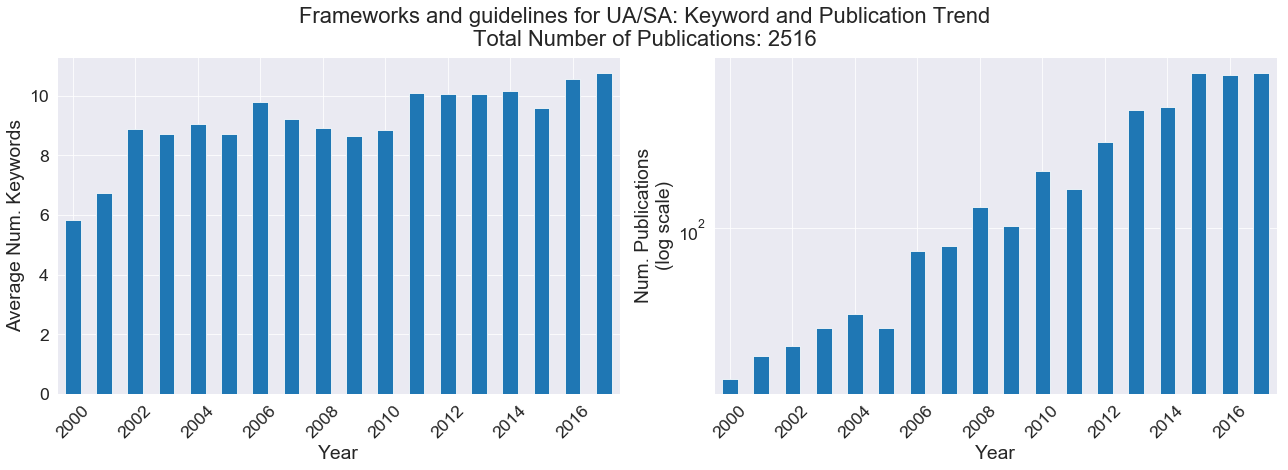

In [37]:
wos_plot.plot_kw_trend(all_frameworks, title='Frameworks and guidelines for UA/SA: Keyword and Publication Trend', save_plot_fn='figs/frameworks_pub_trend.png')

Removing Frameworks papers from the 'new collection'

In [38]:
wo_frameworks = mk.RecordCollection(name='without_frameworks')
for record in ua_sa_papers:
    if not all_frameworks.containsID(record.id):
        wo_frameworks.add(record)

2. Applications of UA/SA

In [39]:
applications = wosis.keyword_matches(wo_frameworks, ['appl', 'watershed', 'quantify', 'perform', 'calculate', 'in this study', 'catchment'], threshold=95.0)

In [40]:
all_applications = applications.combine_recs()

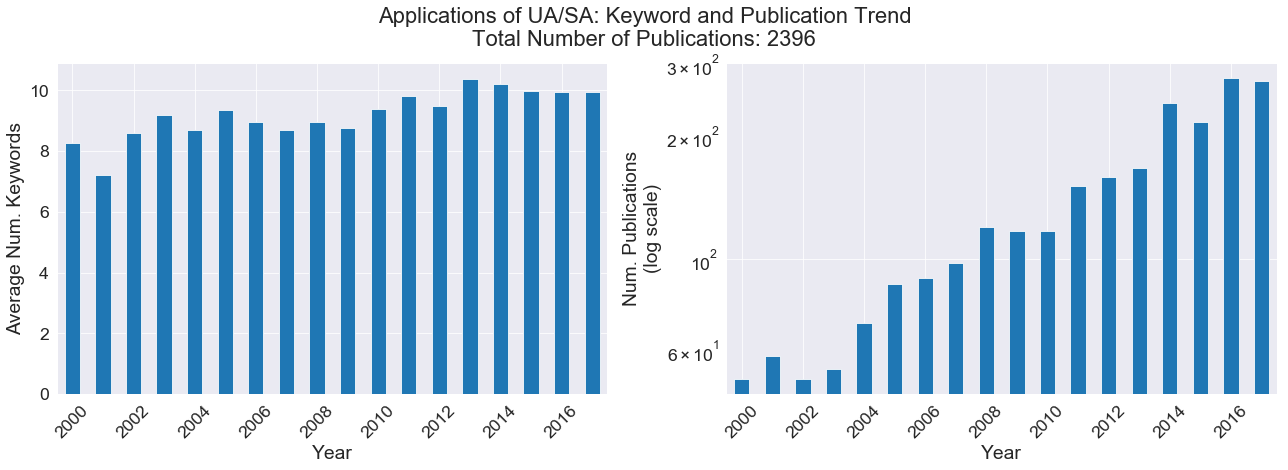

In [41]:
wos_plot.plot_kw_trend(all_applications, title='Applications of UA/SA: Keyword and Publication Trend', save_plot_fn='figs/app_pub_trend.png')

Trends

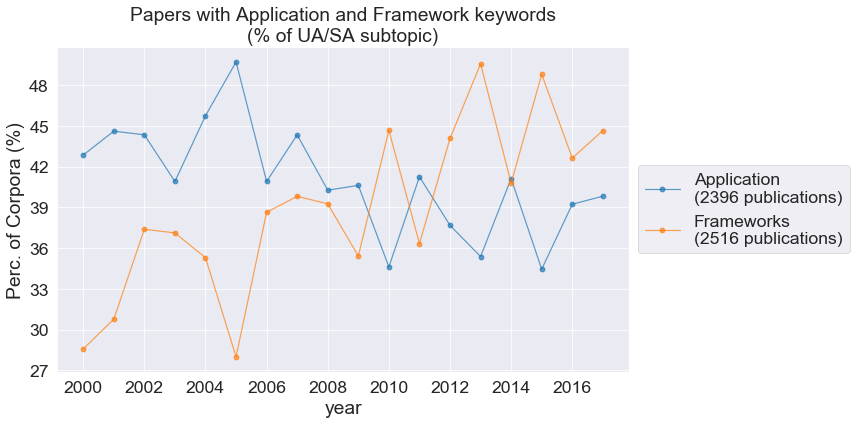

In [42]:
all_applications.name = 'Application'
all_frameworks.name = 'Frameworks'
wos_plot.plot_topic_trend([all_applications, all_frameworks], 
                          total_rc=ua_sa_papers, 
                          title='Papers with Application and Framework keywords\n(% of UA/SA subtopic)',
                          save_plot_fn='figs/combined_topics_keyword_trend_percentage.png')

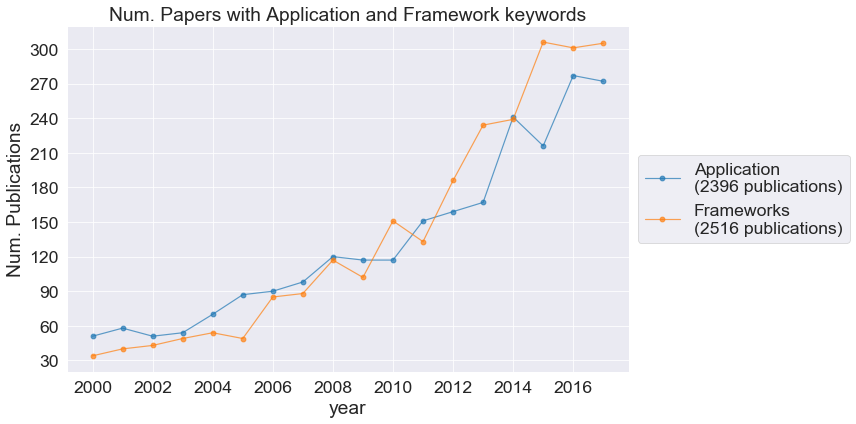

In [43]:
# wos_plot.plot_topic_trend([applications, frameworks], title='Keyword matches topic trend', save_plot_fn='figs/combined_topics_keyword_trend.png')
wos_plot.plot_topic_trend([all_applications, all_frameworks], 
                          title='Num. Papers with Application and Framework keywords', 
                          save_plot_fn='figs/combined_app_framework_topics_keyword_trend.png')

Top cited journals
<br> 1. Frameworks

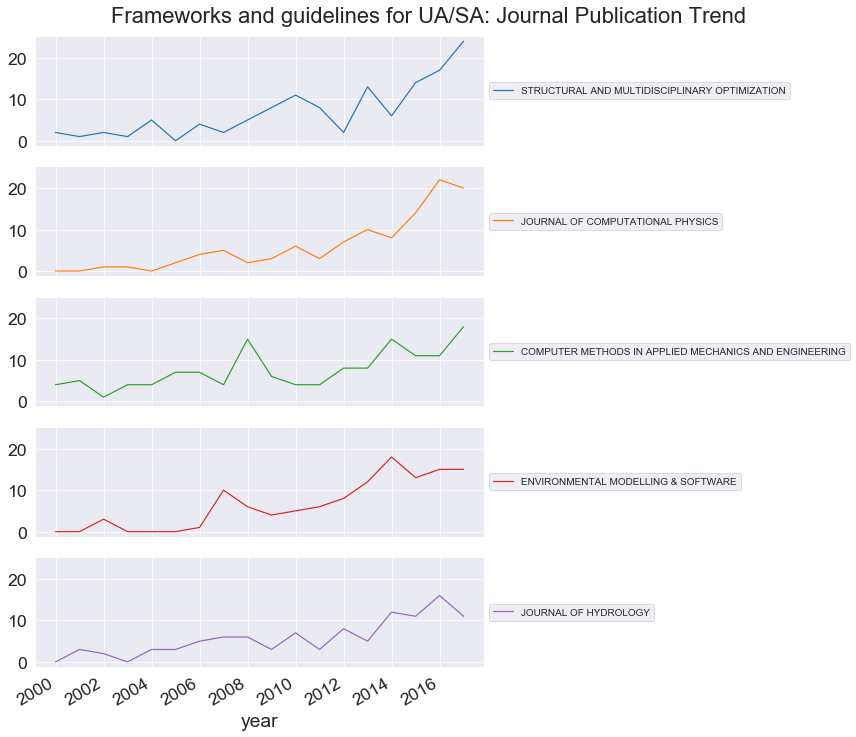

In [44]:
wos_plot.plot_journal_pub_trend(all_frameworks, 
                                top_n=5, 
                                save_plot_fn='figs/frameworks_journal_pub_trend.png', 
                                title='Frameworks and guidelines for UA/SA: Journal Publication Trend')

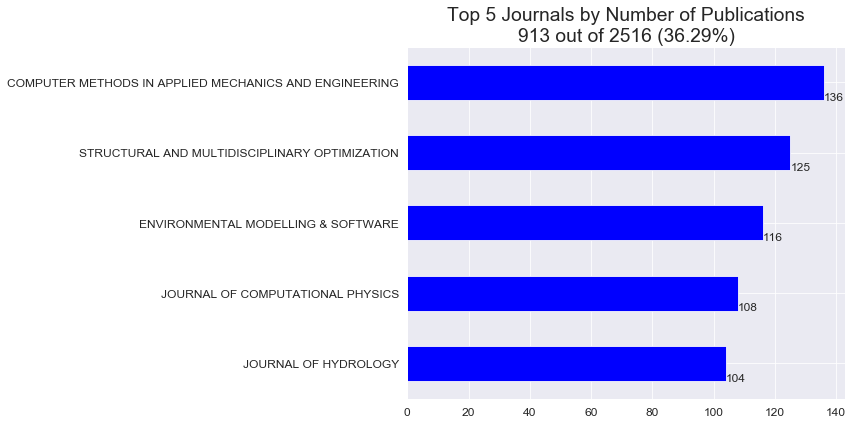

In [45]:
wos_plot.plot_pubs_per_journal(all_frameworks,
                               top_n=5, 
                               annotate=True, 
                               show_stats=True, 
                               save_plot_fn='figs/frameworks_journal_pubs.png')

In [46]:
journals_of_interest_frameworks = ['Environmental Modelling & Software'.upper(), 'Journal of Hydrology'.upper(), 'Journal of Computational Physics'.upper(), 'Structural and Multidisciplinary Optimization'.upper(), 'Computer Methods in Applied Mechanics and Engineering'.upper()]
pubs_for_journals_frameworks = wosis.find_pubs_by_journal(all_frameworks, journals_of_interest_frameworks)

In [48]:
# Get citations for each paper
data_dir = 'tmp'
paper_citations_per_journal_frameworks = {}
for pubs in pubs_for_journals_frameworks:
    paper_citations_per_journal_frameworks[pubs] = wosis.get_num_citations(pubs_for_journals_frameworks[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [49]:
cols_of_interest = ['AU', 'year', 'title', 'journal', 'citations', 'DOI link', 'id']
collection_frameworks = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_frameworks.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_frameworks = collection_frameworks.append(df[cols_of_interest][0:10], ignore_index=True)

In [50]:
top_cited_in_top_journals_frameworks = collection_frameworks.sort_values('citations', ascending=False)
top_cited_in_top_journals_frameworks.head(10)

,AU,year,title,journal,citations,DOI link,id
20,"Bennett, ND|Croke, BFW|Guariso, G|Guillaume, J...",2013,Characterising performance of environmental mo...,Frameworks_ENVIRONMENTAL MODELLING & SOFTWARE,585,https://dx.doi.org/10.1016/j.envsoft.2012.09.011,WOS:000314074000001
21,"Refsgaard, JC|van der Sluijs, JP|Hojberg, AL|V...",2007,Uncertainty in the environmental modelling pro...,Frameworks_ENVIRONMENTAL MODELLING & SOFTWARE,512,https://dx.doi.org/10.1016/j.envsoft.2007.02.004,WOS:000248233200001
22,"Merritt, WS|Letcher, RA|Jakeman, AJ",2003,A review of erosion and sediment transport models,Frameworks_ENVIRONMENTAL MODELLING & SOFTWARE,412,https://dx.doi.org/10.1016/S1364-8152(03)00078-1,WOS:000185453400010
30,"Sigmund, O|Maute, K",2013,Topology optimization approaches A comparative...,Frameworks_STRUCTURAL AND MULTIDISCIPLINARY OP...,399,https://dx.doi.org/10.1007/s00158-013-0978-6,WOS:000328211600001
40,"Yang, J|Reichert, P|Abbaspour, KC|Xia, J|Yang, H",2008,Comparing uncertainty analysis techniques for ...,Frameworks_JOURNAL OF HYDROLOGY,313,https://dx.doi.org/10.1016/j.jhydrol.2008.05.012,WOS:000258853700001
0,"Blatman, G|Sudret, B",2011,Adaptive sparse polynomial chaos expansion bas...,Frameworks_JOURNAL OF COMPUTATIONAL PHYSICS,256,https://dx.doi.org/10.1016/j.jcp.2010.12.021,WOS:000287425400009
10,"Moens, D|Vandepitte, D",2005,A survey of non-probabilistic uncertainty trea...,Frameworks_COMPUTER METHODS IN APPLIED MECHANI...,238,https://dx.doi.org/10.1016/j.cma.2004.03.019,WOS:000227483200012
31,"van Dijk, NP|Maute, K|Langelaar, M|van Keulen, F",2013,Level-set methods for structural topology opti...,Frameworks_STRUCTURAL AND MULTIDISCIPLINARY OP...,207,https://dx.doi.org/10.1007/s00158-013-0912-y,WOS:000325079300001
32,"Shan, SQ|Wang, GG",2010,Survey of modeling and optimization strategies...,Frameworks_STRUCTURAL AND MULTIDISCIPLINARY OP...,194,https://dx.doi.org/10.1007/s00158-009-0420-2,WOS:000274043200005
11,"Roy, CJ|Oberkampf, WL",2011,"A comprehensive framework for verification, va...",Frameworks_COMPUTER METHODS IN APPLIED MECHANI...,171,https://dx.doi.org/10.1016/j.cma.2011.03.016,WOS:000291902400002


In [51]:
export_ds = top_cited_in_top_journals_frameworks.loc[:, top_cited_in_top_journals_frameworks.columns != 'id']
export_ds.to_csv('../data/framework_top_cited_in_top_journals.csv', index=False)

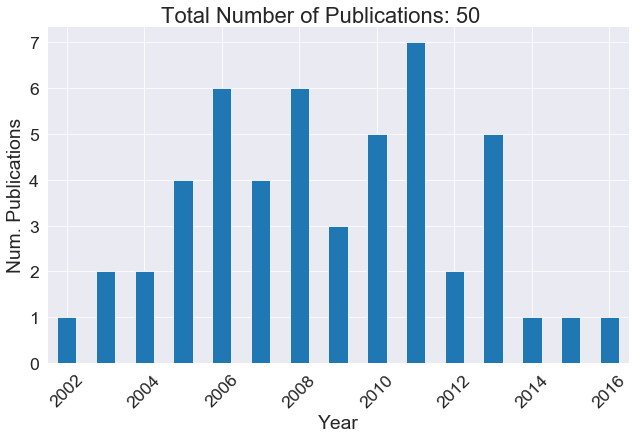

In [52]:
# top_cited_in_top_journals_frameworks.groupby('year').count()['AU'].plot()
# top_cited_in_top_journals_framework.groupby('year').count()['AU'].plot()
framework_top_cited = wosis.extract_recs(top_cited_in_top_journals_frameworks.id, RC)
wos_plot.plot_pub_trend(framework_top_cited)

2. Applications

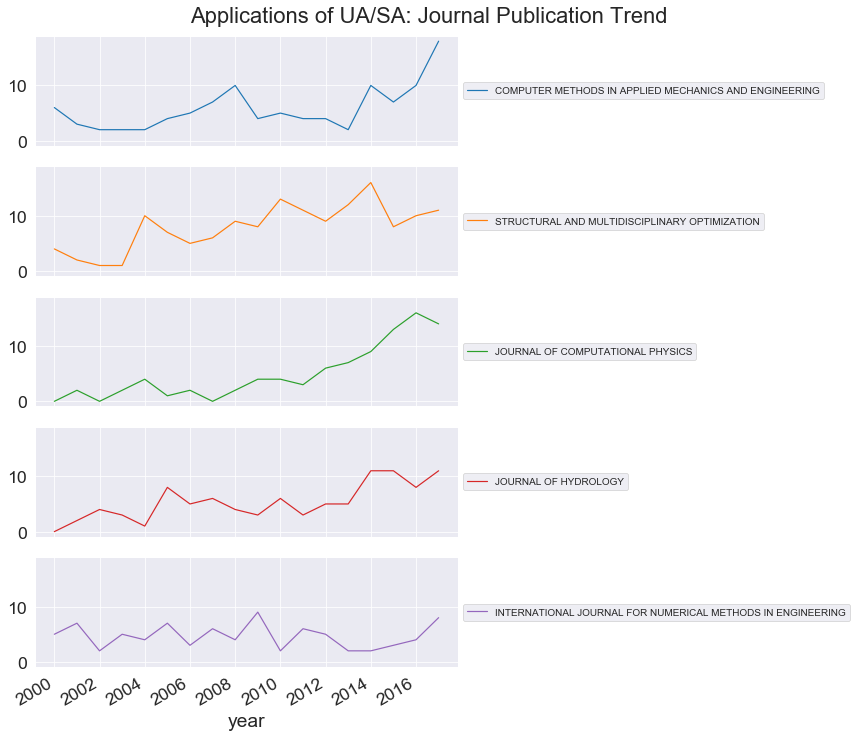

In [53]:
wos_plot.plot_journal_pub_trend(all_applications, top_n=5, save_plot_fn='figs/applications_journal_pub_trend.png', title='Applications of UA/SA: Journal Publication Trend')

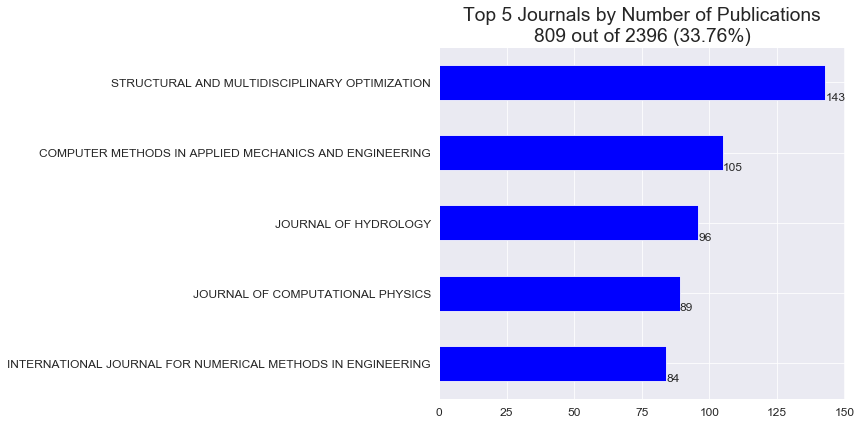

In [54]:
wos_plot.plot_pubs_per_journal(all_applications, top_n=5, annotate=True, show_stats=True, save_plot_fn='figs/app_journal_pubs.png')

In [55]:
journals_of_interest_app = map(str.upper, ['Structural and Multidisciplinary Optimization', 
                                           'Journal of Hydrology',
                                           'Computer Methods in Applied Mechanics and Engineering',
                                           'Journal of Computational Physics',
                                           'International Journal for Numerical Methods in Engineering'])
pubs_for_journals_app = wosis.find_pubs_by_journal(all_applications, list(journals_of_interest_app))

In [56]:
paper_citations_per_journal_app = {}
for pubs in pubs_for_journals_app:
    paper_citations_per_journal_app[pubs] = wosis.get_num_citations(pubs_for_journals_app[pubs], wos_config, 
                                                                    cache_dir=data_dir)

In [57]:
collection_app = pd.DataFrame(columns=cols_of_interest)
for journal_name, df in paper_citations_per_journal_app.items():
    df = wosis.link_to_pub(df)
    df['journal'] = journal_name
    df['DOI link'] = df['DOI link'].str.replace('envost', 'envsoft')  # fix incorrect DOI link
    df = df.sort_values('citations', ascending=False)
    collection_app = collection_app.append(df[cols_of_interest][0:10], ignore_index=True)

In [58]:
top_cited_in_top_journals_app = collection_app.sort_values('citations', ascending=False)
top_cited_in_top_journals_app.head(10)

,AU,year,title,journal,citations,DOI link,id
0,"Oudin, L|Hervieu, F|Michel, C|Perrin, C|Andrea...",2005,Which potential evapotranspiration input for a...,Application_JOURNAL OF HYDROLOGY,325,https://dx.doi.org/10.1016/j.jhydrol.2004.08.026,WOS:000227667300019
1,"Muleta, MK|Nicklow, JW",2005,Sensitivity and uncertainty analysis coupled w...,Application_JOURNAL OF HYDROLOGY,259,https://dx.doi.org/10.1016/j.jhydrol.2004.09.005,WOS:000229413500009
10,"Pedersen, CBW|Buhl, T|Sigmund, O",2001,Topology synthesis of large-displacement compl...,Application_INTERNATIONAL JOURNAL FOR NUMERICA...,237,https://dx.doi.org/10.1002/nme.148,WOS:000167970600005
30,"Le Maitre, OP|Knio, OM|Najm, HN|Ghanem, RG",2004,Uncertainty propagation using Wiener-Haar expa...,Application_JOURNAL OF COMPUTATIONAL PHYSICS,209,https://dx.doi.org/10.1016/j.jcp.2003.11.033,WOS:000221833000002
2,"McVicar, TR|Van Niel, TG|Li, LT|Hutchinson, MF...",2007,Spatially distributing monthly reference evapo...,Application_JOURNAL OF HYDROLOGY,203,https://dx.doi.org/10.1016/j.jhydrol.2007.02.018,WOS:000247196600003
3,"Pappenberger, F|Beven, K|Horritt, M|Blazkova, S",2005,Uncertainty in the calibration of effective ro...,Application_JOURNAL OF HYDROLOGY,201,https://dx.doi.org/10.1016/j.jhydrol.2004.06.036,WOS:000226396500004
4,"Gong, LB|Xu, CY|Chen, DL|Halldin, S|Chen, YQD",2006,Sensitivity of the Penman-Monteith reference e...,Application_JOURNAL OF HYDROLOGY,197,https://dx.doi.org/10.1016/j.jhydrol.2006.03.027,WOS:000241295200022
31,"Le Maitre, OP|Najm, HN|Ghanem, RG|Knio, OM",2004,Multi-resolution analysis of Wiener-type uncer...,Application_JOURNAL OF COMPUTATIONAL PHYSICS,179,https://dx.doi.org/10.1016/j.jcp.2003.12.020,WOS:000222184700005
32,"Oberkampf, WL|Barone, MF",2006,Measures of agreement between computation and ...,Application_JOURNAL OF COMPUTATIONAL PHYSICS,176,https://dx.doi.org/10.1016/j.jcp.2006.03.037,WOS:000239904500002
11,"Stegmann, J|Lund, E",2005,Discrete material optimization of general comp...,Application_INTERNATIONAL JOURNAL FOR NUMERICA...,169,https://dx.doi.org/10.1002/nme.1259,WOS:000228095700005


In [59]:
export_ds = top_cited_in_top_journals_app.loc[:, top_cited_in_top_journals_app.columns != 'id']
export_ds.to_csv('../data/top_cited_in_top_journals_app.csv', index=False)

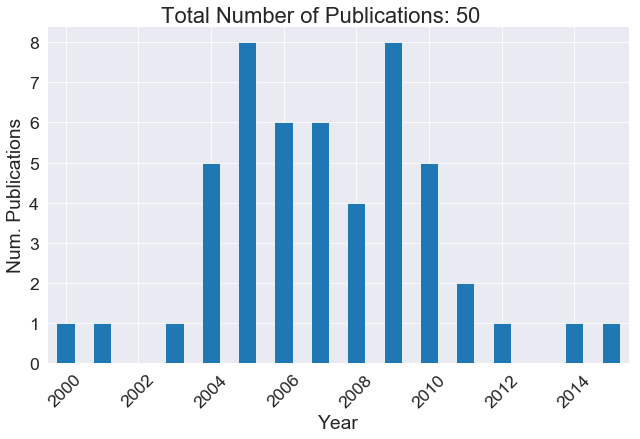

In [60]:
application_top_cited = wosis.extract_recs(top_cited_in_top_journals_app.id, RC)
wos_plot.plot_pub_trend(application_top_cited)

In [61]:
top_cited_in_top_journals_app.loc[top_cited_in_top_journals_app['year'] == 2005, 'title'].tolist()

['Which potential evapotranspiration input for a lumped rainfall-runoff model? Part 2 - Towards a simple and efficient potential evapotranspiration model for rainfall-runoff modelling',
 'Sensitivity and uncertainty analysis coupled with automatic calibration for a distributed watershed model',
 'Uncertainty in the calibration of effective roughness parameters in HEC-RAS using inundation and downstream level observations',
 'Discrete material optimization of general composite shell structures',
 'Topology optimization of channel flow problems',
 'Multi-objective robust optimization using a sensitivity region concept',
 'Sensitivity analyses of a distributed catchment model to verify the model structure',
 'Adaptive probability analysis using an enhanced hybrid mean value method']